In [1]:
from pandas import read_csv, concat
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot as plt
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
X_train = read_csv('./csv/train_modif.csv')
X_test = read_csv('./csv/test_modif.csv')
y_train = X_train.SalePrice.values.astype(int)
del X_train['SalePrice']

In [3]:
X_train.shape[1:]

(313,)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape = X_train.shape[1:]))
# model.add(Dense(X_train.shape[1]*3, activation='relu'))
# model.add(Dense(X_train.shape[1]*3, activation='relu'))
model.add(Dense(1))

In [5]:
from tensorflow.keras.optimizers import SGD

loss = 'mse'
LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [7]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/200
1460/1460 [==============================] - 0s 306us/sample - loss: 39039221760.0000 - accuracy: 0.0000e+00
Epoch 2/200
1460/1460 [==============================] - 0s 5us/sample - loss: 35044904960.0000 - accuracy: 0.0000e+00
Epoch 3/200
1460/1460 [==============================] - 0s 5us/sample - loss: 32630016000.0000 - accuracy: 0.0000e+00
Epoch 4/200
1460/1460 [==============================] - 0s 4us/sample - loss: 30882576384.0000 - accuracy: 0.0000e+00
Epoch 5/200
1460/1460 [==============================] - 0s 4us/sample - loss: 29441896448.0000 - accuracy: 0.0000e+00
Epoch 6/200
1460/1460 [==============================] - 0s 4us/sample - loss: 28162455552.0000 - accuracy: 0.0000e+00
Epoch 7/200
1460/1460 [==============================] - 0s 5us/sample - loss: 26983264256.0000 - accuracy: 0.0000e+00
Epoch 8/200
1460/1460 [==============================] - 0s 5us/sample - loss: 25877022720.0000 - accuracy: 0.0000e+00
Epoch 9/200
1460/1460 [=

Epoch 70/200
1460/1460 [==============================] - 0s 4us/sample - loss: 2557728000.0000 - accuracy: 0.0000e+00
Epoch 71/200
1460/1460 [==============================] - 0s 5us/sample - loss: 2476200192.0000 - accuracy: 0.0000e+00
Epoch 72/200
1460/1460 [==============================] - 0s 5us/sample - loss: 2397877504.0000 - accuracy: 0.0000e+00
Epoch 73/200
1460/1460 [==============================] - 0s 5us/sample - loss: 2322632192.0000 - accuracy: 0.0000e+00
Epoch 74/200
1460/1460 [==============================] - 0s 5us/sample - loss: 2250342144.0000 - accuracy: 0.0000e+00
Epoch 75/200
1460/1460 [==============================] - 0s 5us/sample - loss: 2180892928.0000 - accuracy: 0.0000e+00
Epoch 76/200
1460/1460 [==============================] - 0s 3us/sample - loss: 2114169984.0000 - accuracy: 0.0000e+00
Epoch 77/200
1460/1460 [==============================] - 0s 4us/sample - loss: 2050065408.0000 - accuracy: 0.0000e+00
Epoch 78/200
1460/1460 [========================

Epoch 139/200
1460/1460 [==============================] - 0s 5us/sample - loss: 603934144.0000 - accuracy: 0.0000e+00
Epoch 140/200
1460/1460 [==============================] - 0s 5us/sample - loss: 598561024.0000 - accuracy: 0.0000e+00
Epoch 141/200
1460/1460 [==============================] - 0s 5us/sample - loss: 593388736.0000 - accuracy: 0.0000e+00
Epoch 142/200
1460/1460 [==============================] - 0s 4us/sample - loss: 588409792.0000 - accuracy: 0.0000e+00
Epoch 143/200
1460/1460 [==============================] - 0s 4us/sample - loss: 583616768.0000 - accuracy: 0.0000e+00
Epoch 144/200
1460/1460 [==============================] - 0s 4us/sample - loss: 579001920.0000 - accuracy: 0.0000e+00
Epoch 145/200
1460/1460 [==============================] - 0s 4us/sample - loss: 574558720.0000 - accuracy: 0.0000e+00
Epoch 146/200
1460/1460 [==============================] - 0s 4us/sample - loss: 570280064.0000 - accuracy: 0.0000e+00
Epoch 147/200
1460/1460 [=======================

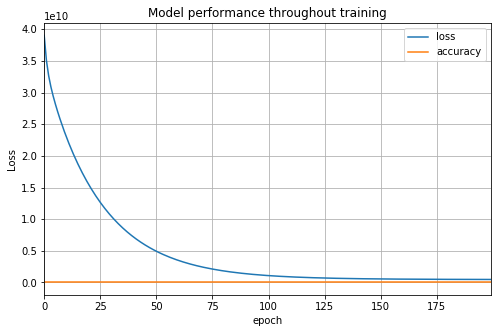

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [9]:
y_predict = model.predict(X_train)

In [10]:
metrics.mean_absolute_error(y_train, y_predict)

14164.066968107876

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred = y_pred.reshape(y_pred.shape[0])
# y_pred

array([111309.77, 150285.84, 179832.1 , ..., 168353.02, 109064.31,
       217460.78], dtype=float32)

In [13]:
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice':y_pred})
submission

,Id,SalePrice
0,1461,111309.773438
1,1462,150285.843750
2,1463,179832.093750
3,1464,188905.546875
4,1465,201899.203125
5,1466,162810.218750
6,1467,168769.312500
7,1468,154876.609375
8,1469,196309.750000
9,1470,112227.750000


In [14]:
submission.to_csv('./csv/prediction.csv', index=False)